# Исследовательский анализ данных о продажах автомобилей BMW

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
path = kagglehub.dataset_download("y0ussefkandil/bmw-sales2010-2024")

In [3]:
bmw = pd.read_csv(path + '/BMW sales data (2010-2024).csv')

In [4]:
bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [21]:
# Проверяю типы данных в каждой колонке.
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
# Проверяю наличие пустых значений.
bmw.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [19]:
# Проверяю наличие дубликатов
bmw.duplicated().sum()

0

In [44]:
# Рассчитваю базовые статистики для числовых типов данных.
bmw.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [49]:
bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
??

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/br/yryz75s94419__57gscfgy900000gn/T/ipykernel_4051/4199987020.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/br/yryz75s94419__57gscfgy900000

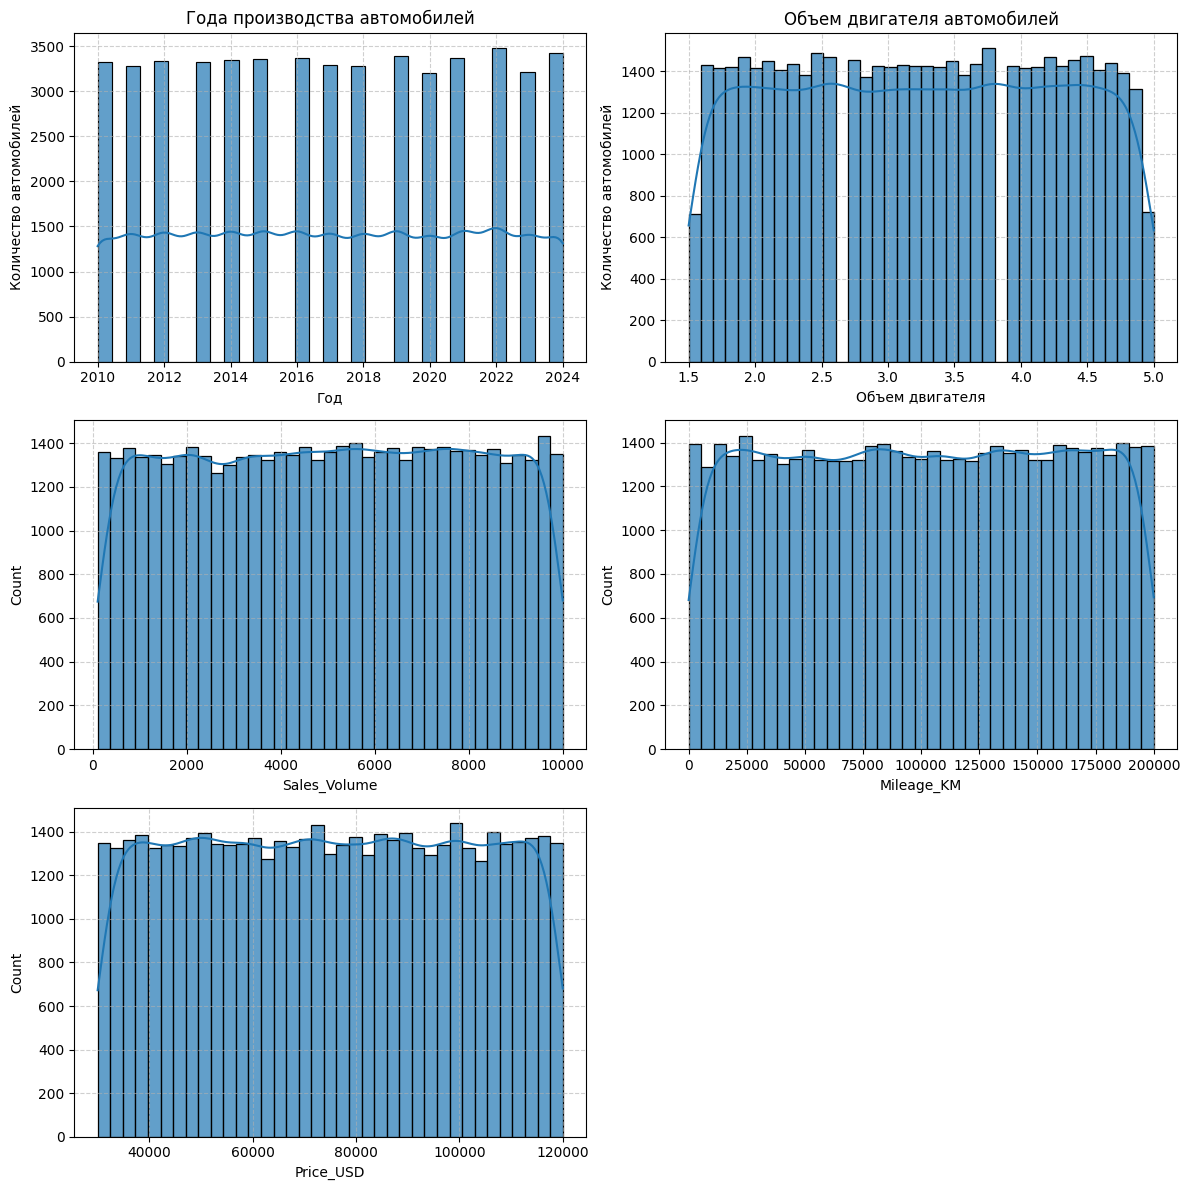

In [91]:
# Посмотрим на распределение ключевых показаталей датасета
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.title('Года производства автомобилей')
sns.histplot(data = bmw, x = 'Year', kde=True, alpha = 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Год')
plt.ylabel('Количество автомобилей')
plt.tight_layout()

plt.subplot(3,2,2)
plt.title('Объем двигателя автомобилей')
sns.histplot(data = bmw, x = 'Engine_Size_L', kde=True, alpha = 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Объем двигателя')
plt.ylabel('Количество автомобилей')
plt.tight_layout()

plt.subplot(3,2,3)
sns.histplot(data = bmw, x = 'Sales_Volume', kde=True, alpha = 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.subplot(3,2,4)
sns.histplot(data = bmw, x = 'Mileage_KM', kde=True, alpha = 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.subplot(3,2,5)
sns.histplot(data = bmw, x = 'Price_USD', kde=True, alpha = 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [73]:
??plt.subplot

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

In [45]:
sales_per_year = bmw.groupby('Year', as_index=False).Sales_Volume.sum()
sales_per_year

,Year,Sales_Volume
0,2010,16933445
1,2011,16758941
2,2012,16751895
3,2013,16866733
4,2014,16958960
5,2015,17010207
6,2016,16957550
7,2017,16620811
8,2018,16412273
9,2019,17191956


,Year,Sales_Volume
0,2010,16933445
1,2011,16758941
2,2012,16751895
3,2013,16866733
4,2014,16958960
5,2015,17010207
6,2016,16957550
7,2017,16620811
8,2018,16412273
9,2019,17191956


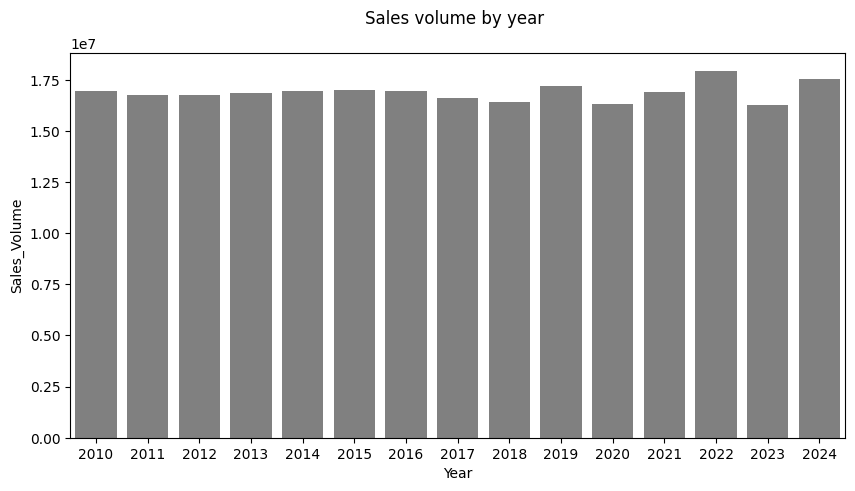

In [12]:
plt.figure(figsize=(10,5))
plt.title('Sales volume by year \n')
sns.barplot(data = sales_per_year, x = 'Year', y = 'Sales_Volume', color='grey')
plt.show()

In [13]:
bmw_region = bmw.groupby('Region', as_index=False).Sales_Volume.sum().sort_values(by = 'Sales_Volume')

<Axes: xlabel='Region', ylabel='Sales_Volume'>

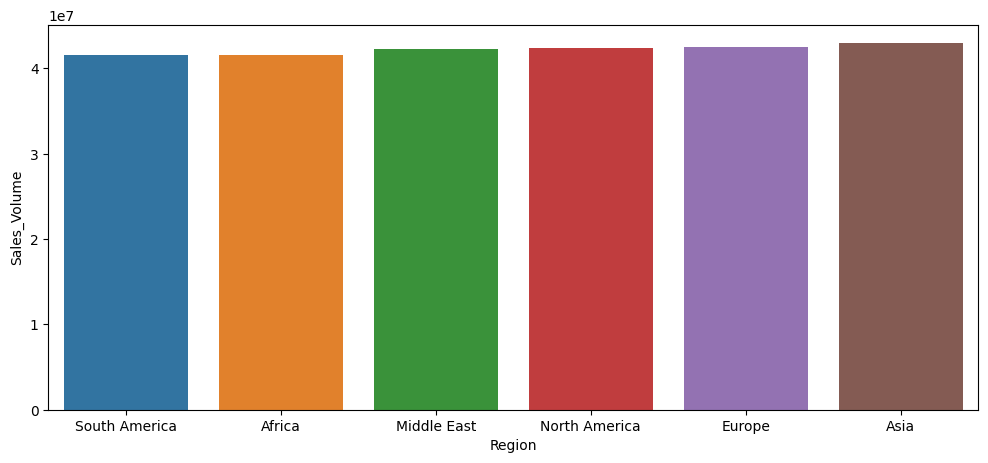

In [14]:
plt.figure(figsize = (12,5))
sns.barplot(data = bmw_region, x = 'Region', y = 'Sales_Volume')

In [15]:
bmw

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
